<h1>Homework 3</h1>
<p>Luis Gerson Noboa Martillo</p>

<h2>Exercise 1</h2>

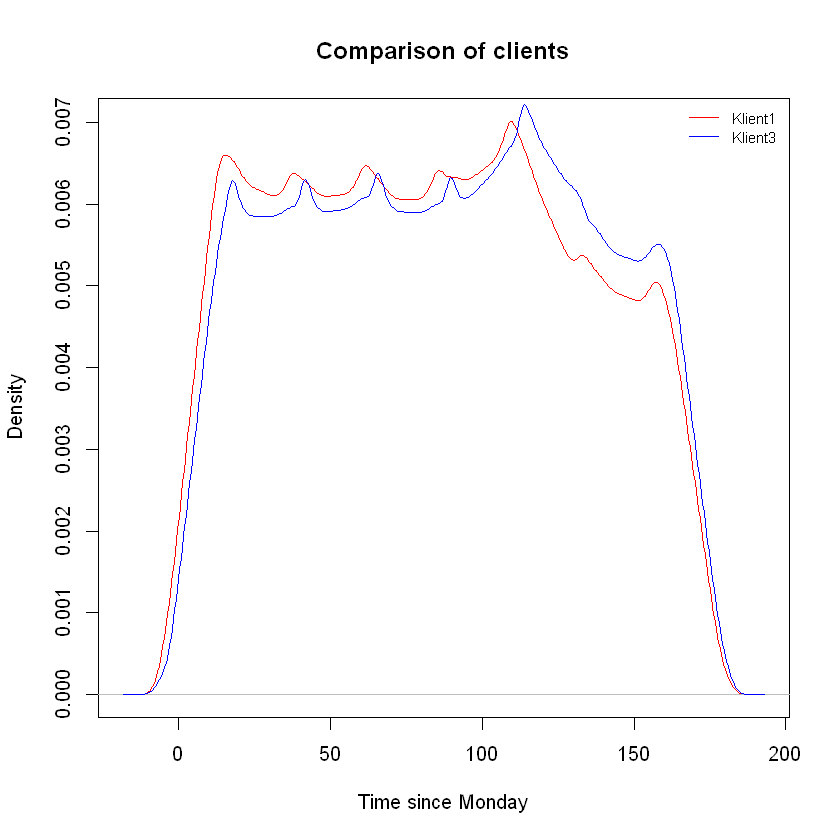

In [5]:
library(ggplot2)
klient1 = read.table('klient1.txt', header = FALSE)
klient3 = read.table('klient3.txt', header = FALSE)

den1 = density(klient1$V1, kernel = "triangular", adjust = 2)
plot(den1, col="red", xlab="Time since Monday", main="Comparison of clients")

den3 = density(klient3$V1, kernel="triangular", adjust = 2)
lines(den3, col="blue")
legend('topright', c("Klient1", "Klient3") , lty=1, col=c('red', 'blue'), bty='n', cex=.75)

<p>I chose the triangular kernel provided by R and adjust of 2 so that the bandwidth is 8.586 for klient1 and 8.637 for klient 3. Since the data shows the time of purchase for two different sets of clients, it makes sense that it has 7 different spikes for each day of the week, and then a drop for times in the morning where there are no purchases. Other versions of the graph with different kernels and widths showed the actual drop in the morning represented in the graph but I think that graph looked undersmoothed so that's why the adjust parameter was increased. The kernel was changed from gaussian to triangular because gaussian (and others) tried to round the spikes too much and didn't reflect the spikes good enough.</p>
<p>The graph itself shows the time in which two sets of clients did their purchases. This is done through counting the amount of time that has passed since Monday at 12:00 AM. So, for example, Monday accounts for values between 0 and 24, Tuesday between 24 and 48, and so on. </p>
<p>It is very logical, then, to see these spikes in each day. However, for some reason, klient3 seems to do a less significant amount of purchases on Saturday, something that doesn't happen with klient1. Also, for both sets, Friday is the busiest day, and we can see a significant drop on numbers for Saturday and Sunday compared to the rest of the week. Also, clients under the klient1 moniker seem to do their purchases earlier in the day than klient3, since their graph is slightly placed to the left.</p>

<h2>Exercise 2</h2>

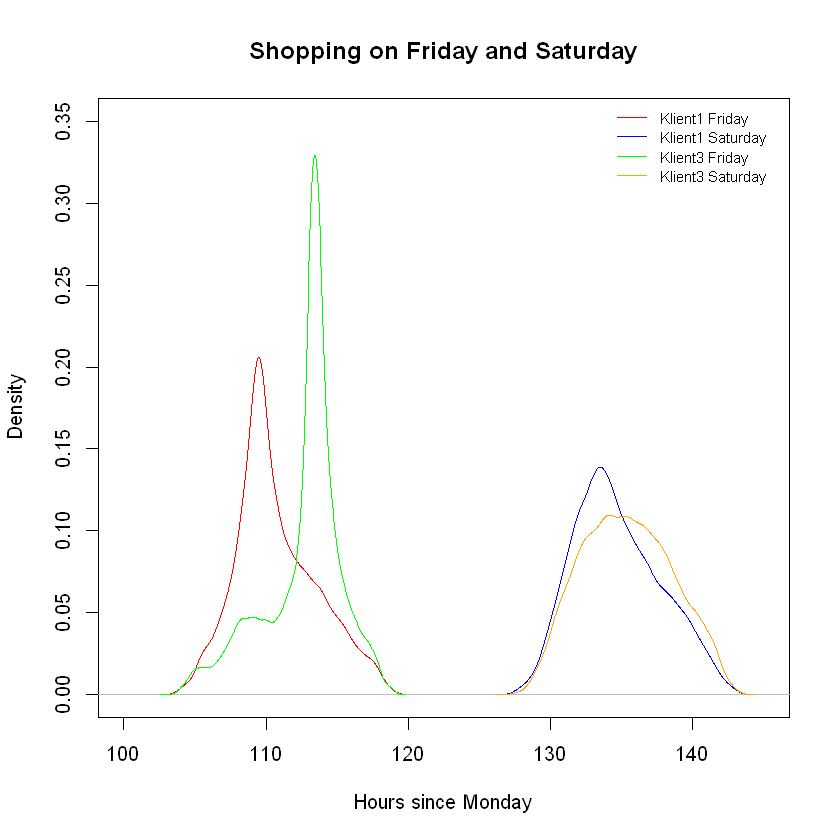

In [9]:
#ex2  
klient1friday = subset(klient1, V1 >= 96 & V1 < 120)
klient1saturday = subset(klient1, V1 >= 120 & V1 < 144)

klient3friday = subset(klient3, V1 >= 96 & V1 < 120)
klient3saturday = subset(klient3, V1 >= 120 & V1 < 144)

den1friday = density(klient1friday$V1, na.rm = TRUE)
den1saturday = density(klient1saturday$V1, na.rm = TRUE)
den3friday = density(klient3friday$V1, na.rm = TRUE)
den3saturday= density(klient3saturday$V1, na.rm = TRUE)

plot(den1friday, col="red", type='l', xlim=range(c(100, 145)), ylim = range(c(0.00, 0.35)), main = "Shopping on Friday and Saturday", xlab = "Hours since Monday")
lines(den1saturday, col="blue", type='l')
lines(den3friday, col="green")
lines(den3saturday, col="orange")
legend('topright', c("Klient1 Friday", "Klient1 Saturday", "Klient3 Friday", "Klient3 Saturday") , lty=1, col=c('red', 'blue', 'green', 'orange'), bty='n', cex=.75)

<p>Here we can see the two different spikes for times on Friday and Saturday for both clients. As seen on the previous task, the data for Klient1 is always earlier in the day, so these clients make their purchases earlier. Here you can also see that Klient3 do less purchases on a Saturday. Unlike the graph in exercise 1, here we can see the drop in the morning hours for both clients since the shop doesn't attend in these times.</p>

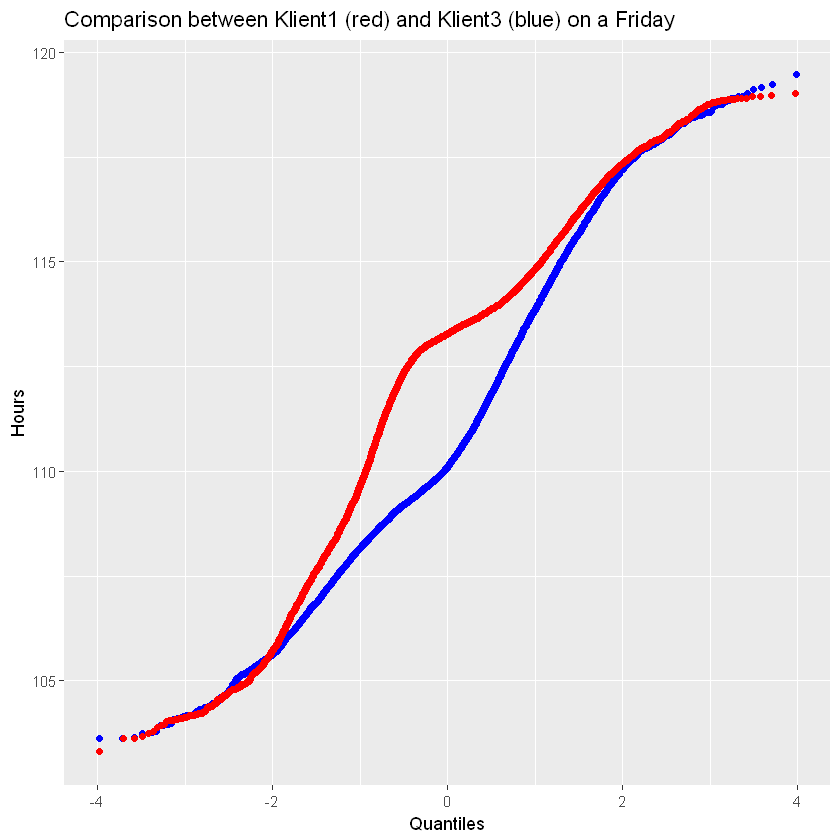

In [11]:
ggplot(data=klient1friday, aes(sample=V1)) +
  geom_qq(fill="blue", color="blue") +
  geom_qq(data=klient3friday, aes(sample=V1), color="red") +
  labs("title" = "Comparison between Klient1 (red) and Klient3 (blue) on a Friday", y="Hours", x = "Quantiles")
  

<p>In the case of klient1 (the red line), the plot shows a graph that vaguely resembles a normal distribution. It starts slow, then increases towards the center (signaled by the abrupt increase towards the center of the red line), and then stops its growth at the end of the line. It is not fully normally distributed, though, since, after the big spike, there are some fluctuations that alter its shape. This means that, for klient1, customers normally make their purchases toward the center of the day instead of later times. This can also be seen on the density graph defined above.</p>
<p>For klient3 (blue), the situation is very different. We see initially a small increase but then it is always lower than klient1. However, towards the end of the day, we see a huge increase in customers. This means that customers on this set do their purchases much later in the day than klient1 customers, so the data is condensed more to the right of the graph, as we can see from the density plots above.</p>
<p>It is important to note that, because the hours are in the Y plot and not in the X, the shape of the graphs here clashes with the example given on the lectures that dealt with interpretation of QQ plots. However, it's just a matter of analyzing the graph in a different way.</p>

<h2>Exercise 3</h2>

<p>The data shows the date, time, product that was bought and the product sold from January 1, 2014 until December 31, 2014. This data was gathered throughout five different shops, here identified as shops 3, 4, 18, 21 and 32. There are 11 different products for sale:</p>
<ul>
<li>Banana</li>
<li>Coffee Cream</li>
<li>Eggs type 1</li>
<li>Eggs type 2</li>
<li>Grapes</li>
<li>Milk type 1</li>
<li>Milk type 2</li>
<li>Sour cream type 1</li>
<li>Sour cream type 2</li>
<li>Vastlakukkel</li>
<li>Whipped cream</li>
</ul>

<p>This is the amount of products sold in all shops:</p>

In [14]:
#ex3
product = read.table('product_time_shop.txt', header = TRUE, stringsAsFactors = F, sep = ";")
productdf = data.frame(product)

setNames(aggregate(shop_id ~ product, data = productdf, FUN = length), c("Product on all shops", "Amount"))

Product on all shops,Amount
Banana,24847
Coffee_Cream,20531
Eggs_1,10089
Eggs_2,281
Grapes,3202
Milk_1,14874
Milk_2,25715
Sour_Cream_1,9704
Sour_Cream_2,15876
Vastlakukkel,4109


<p>And this are the details of information of products sold in specific shops</p>

In [15]:
subset18 <- subset(product, shop_id == 18)
setNames(aggregate(shop_id ~ product, data = subset18, FUN = length), c("Product on Shop 18", "Amount"))

subset21 <- subset(product, shop_id == 21)
setNames(aggregate(shop_id ~ product, data = subset21, FUN = length), c("Product on Shop 21", "Amount"))

subset3 <- subset(product, shop_id == 3)
setNames(aggregate(shop_id ~ product, data = subset3, FUN = length), c("Product on Shop 3", "Amount"))

subset32 <- subset(product, shop_id == 32)
setNames(aggregate(shop_id ~ product, data = subset32, FUN = length), c("Product on Shop 32", "Amount"))

subset4 <- subset(product, shop_id == 4)
setNames(aggregate(shop_id ~ product, data = subset4, FUN = length), c("Product on Shop 4", "Amount"))

Product on Shop 18,Amount
Banana,4080
Coffee_Cream,4516
Eggs_1,1326
Grapes,495
Milk_1,2740
Milk_2,4968
Sour_Cream_1,1817
Sour_Cream_2,3046
Vastlakukkel,730
Whipped_Cream,1168


Product on Shop 21,Amount
Banana,1727
Coffee_Cream,1418
Eggs_1,1106
Grapes,273
Milk_1,836
Milk_2,2440
Sour_Cream_1,848
Sour_Cream_2,1569
Vastlakukkel,273
Whipped_Cream,600


Product on Shop 3,Amount
Banana,6778
Coffee_Cream,4272
Eggs_1,1880
Eggs_2,100
Grapes,710
Milk_1,3568
Milk_2,5629
Sour_Cream_1,2597
Sour_Cream_2,2891
Vastlakukkel,939


Product on Shop 32,Amount
Banana,3585
Coffee_Cream,3066
Eggs_1,2073
Grapes,525
Milk_1,2557
Milk_2,4369
Sour_Cream_1,1236
Sour_Cream_2,2866
Vastlakukkel,383
Whipped_Cream,1396


Product on Shop 4,Amount
Banana,8677
Coffee_Cream,7259
Eggs_1,3704
Eggs_2,181
Grapes,1199
Milk_1,5173
Milk_2,8309
Sour_Cream_1,3206
Sour_Cream_2,5504
Vastlakukkel,1784


<p>In order to get the periods, some columns that deal with days were added to the data.</p>

In [17]:
txt=product$date
cmb_date=paste(substr(txt,1,4),'-',substr(txt,5,6),'-',substr(txt,7,8),sep='')
mydates <- as.Date(cmb_date)
product["weekdays"] <- weekdays(mydates)
product["months"] <- months(mydates)
product["days"] <- as.numeric(format(mydates,"%d"))
product["doy"] <- as.numeric(format(mydates,"%j"))
product["year"] <- as.numeric(format(mydates,"%Y"))

<p>This lets us calculate the different years and months that the data deals with.</p>

In [19]:
print("Dates covered")
unique(mydates)

print("Years covered")
unique(product$year)

print("Months covered")
unique(product$months)

[1] "Dates covered"


[1] "2014-01-04" "2014-01-19" "2014-02-08" "2014-03-04" "2014-04-07"
 [6] "2014-04-15" "2014-06-01" "2014-06-07" "2014-10-24" "2014-10-31"
[11] "2014-12-23" "2014-12-31"

[1] "Years covered"


[1] 2014

[1] "Months covered"


[1] "Enero"     "Febrero"   "Marzo"     "Abril"     "Junio"     "Octubre"  
[7] "Diciembre"

<h2>Exercise 4</h2>

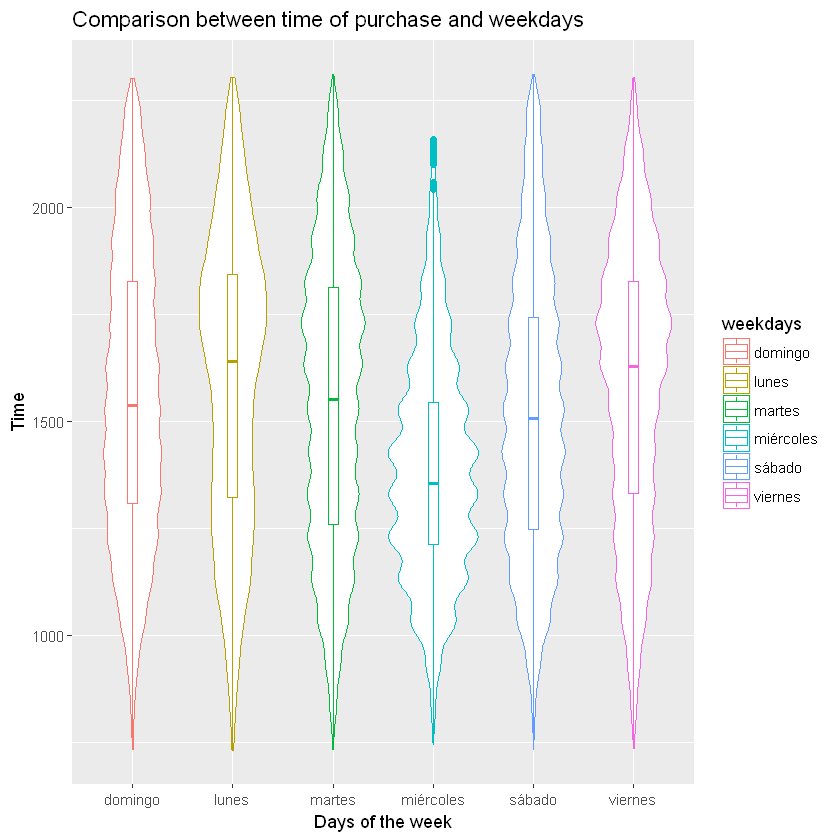

In [20]:
#weekdays
#time vs days
ggplot(product, aes(x=weekdays, y=time, color=weekdays)) + 
  geom_violin() + 
  geom_boxplot(width=.1) +
  labs(y="Time", x = "Days of the week", title = "Comparison between time of purchase and weekdays")

<p>Comparing the time of purchase with the weekdays I expect that all days display high values for hours after 5PM, since that is when people start getting out of their offices. Also, Fridays nights should be very high, as well as Saturday and Sunday mornings.</p>
<p>As we can see from the data, Mondays (lunes) and Friday (Viernes) do show an increase in sales in the afternoon and night. However, days like Wednesday (miércoles) show a very strange pattern, in which people buy stuff early at many points in the morning and then decreases abruptly. Also, Tuesday (martes) have a normal distribution-like spread, but condensating a little more data towards the afternoon. I expected the weekends to have more people towards the morning but here we can see that it is pretty evenly distributed.</p>
<p>There is no sales registered on Thursdays.</p>

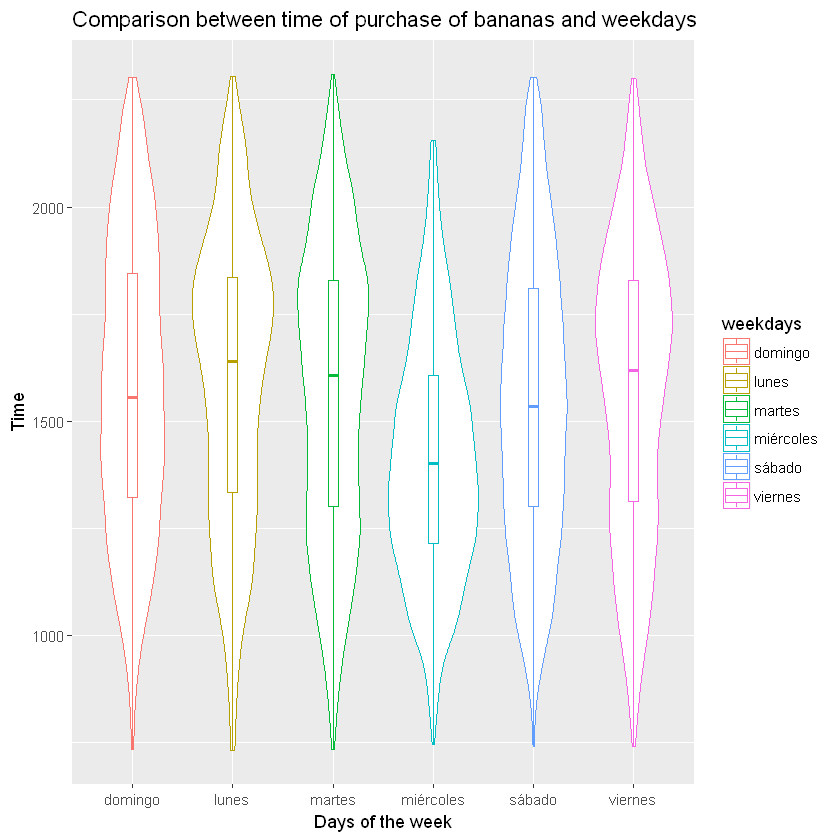

In [34]:
bananaSubset = subset(product, product == "Banana")
ggplot(bananaSubset, aes(x=weekdays, y=time, color=weekdays)) + 
  geom_violin() + 
  geom_boxplot(width=.1) +
  labs(y="Time", x = "Days of the week", title = "Comparison between time of purchase of bananas and weekdays")

<p>I expect this graph to display very similar patterns to the one that showed all purchases. Bananas are the most sold item so they are the most influential on the overall trends.</p>
<p>As we can see, the graph looks similar to the first one, but without the weird artifacts on Wednesday. Here the tendency of buying in the afternoon/night is more apparent, with the violin getting wider on the top, which shows the late hours of the day. All of the tendencies found on the first graph are present here, such as Friday nights being very busy, weekends being busy towards the middle of the day, etc.</p>

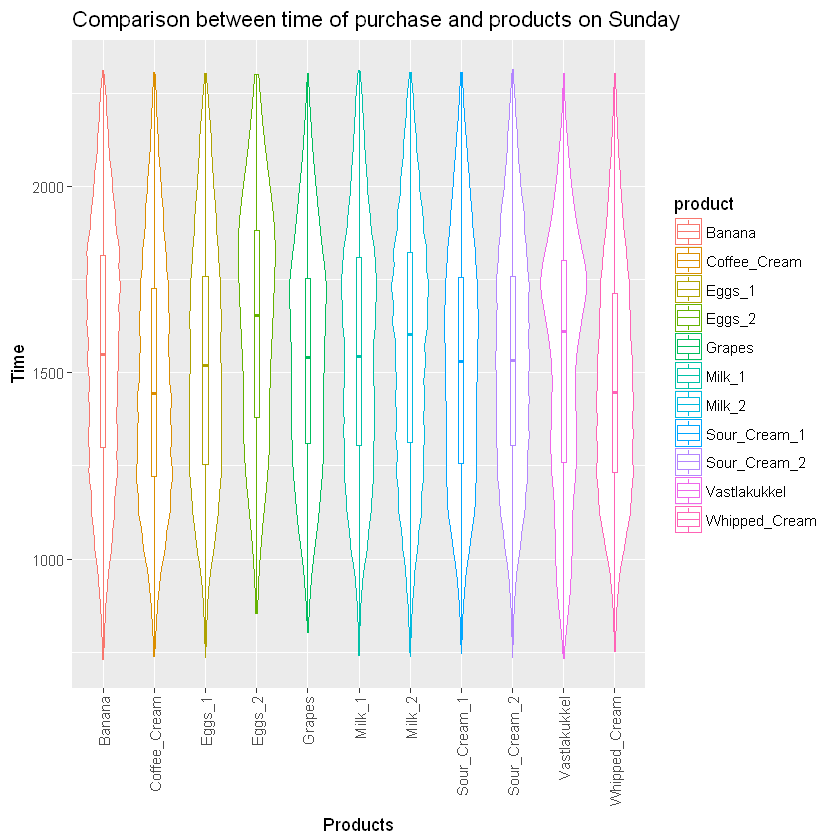

In [23]:
#products
#time of day vs products on sunday
sundaySubset = subset(product, weekdays != "domingo")

ggplot(sundaySubset, aes(x=product, y=time, color=product)) + 
  geom_violin() + 
  geom_boxplot(width=.1) +
  labs(y="Time", x = "Products", title = "Comparison between time of purchase and products on Sunday") +
  theme(axis.text.x=element_text(angle=90,hjust=1,vjust=0.5))
  

<p>On this graph I expected all products to follow the average trend of buying in the middle of the day or in the night, with maybe stuff used for breakfast bought earlier in the morning than, say, sour cream.</p>
<p>The graph does show a that there are two bigger areas in the graph that correspond to midday and night. However, stuff like Vastlakukkel are sold in huge amounts during the night, much more than other products. Probably people prefer to have the dessert in the dinner than in lunch. There's no apparent correlation between products that can compose a breakfast, like milks and egg, with the time they're bought. In fact, Eggs type 2 are never sold at early hours and its most popular time is the night.</p>

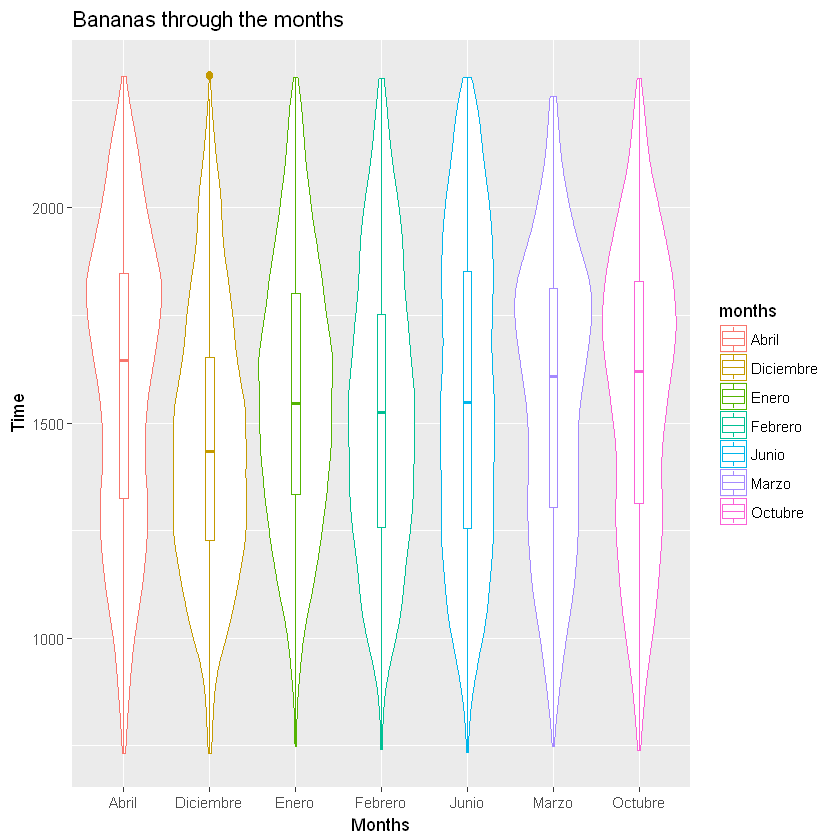

In [24]:
ggplot(bananaSubset, aes(x=months, y=time, color=months)) + 
  geom_violin() + 
  geom_boxplot(width=.1) +
  labs(y="Time", x = "Months", title = "Bananas through the months")

<p>I expected this graph to show no significant variations in months, since bananas are not a seasonal fruit, so it should be the same in any month. Also, times should probably be the same as in previous graphs, with increases in the midday and night.</p>
<p>However, we can see from the graph that this is not true.. There are fewer sales of bananas in june. Also, a curious thing is that sales tend to be earlier in the day for colder months, such as December, January and February. We can see in April, March and October that the time tends to the night. Probably this is not a result of the product itself, but only sensical because people don't want to shop while it's -20C outside.</p>

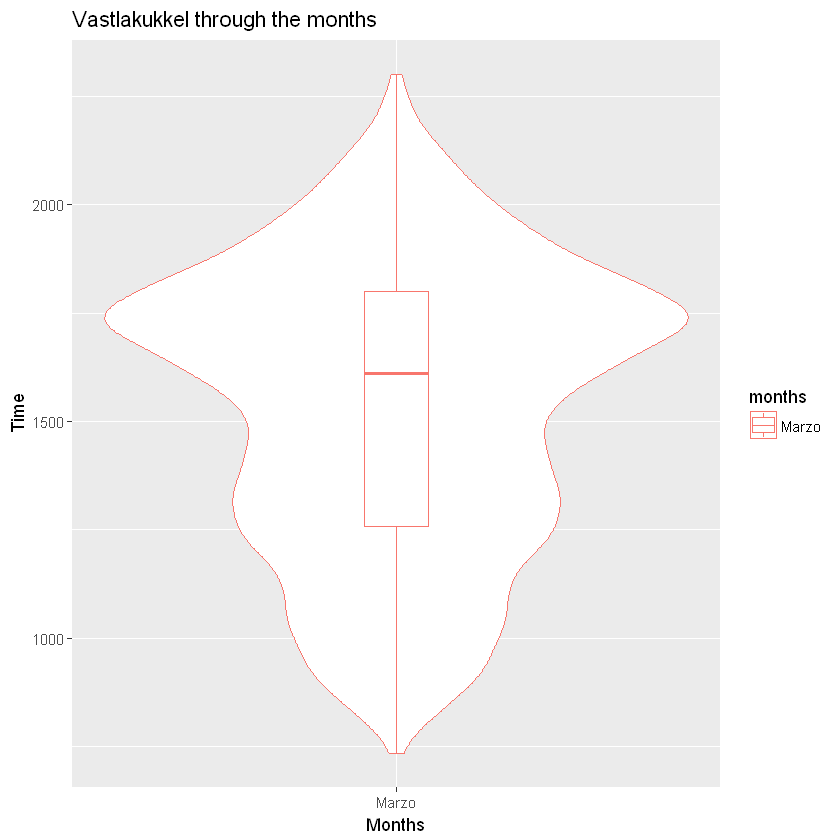

In [25]:
vastlakukkelSubset = subset(product, product == "Vastlakukkel")
ggplot(vastlakukkelSubset, aes(x=months, y=time, color=months)) + 
  geom_violin() + 
  geom_boxplot(width=.1) +
  labs(y="Time", x = "Months", title = "Vastlakukkel through the months")

<p>Vastlakukkel is a special case, since it is a seasonal dessert that is sold only during February and March. This means that it will only show results in March because February is not present in the data set. Probably it will also display the tendency of having more products sold in midday and in the night.</p>
<p>As expected, there's no sales for Vastlakukkel in other months other than March. What is surprising is the huge amount of Vastlakukkel sold in the night, something that was already seen in a previous graph.</p>

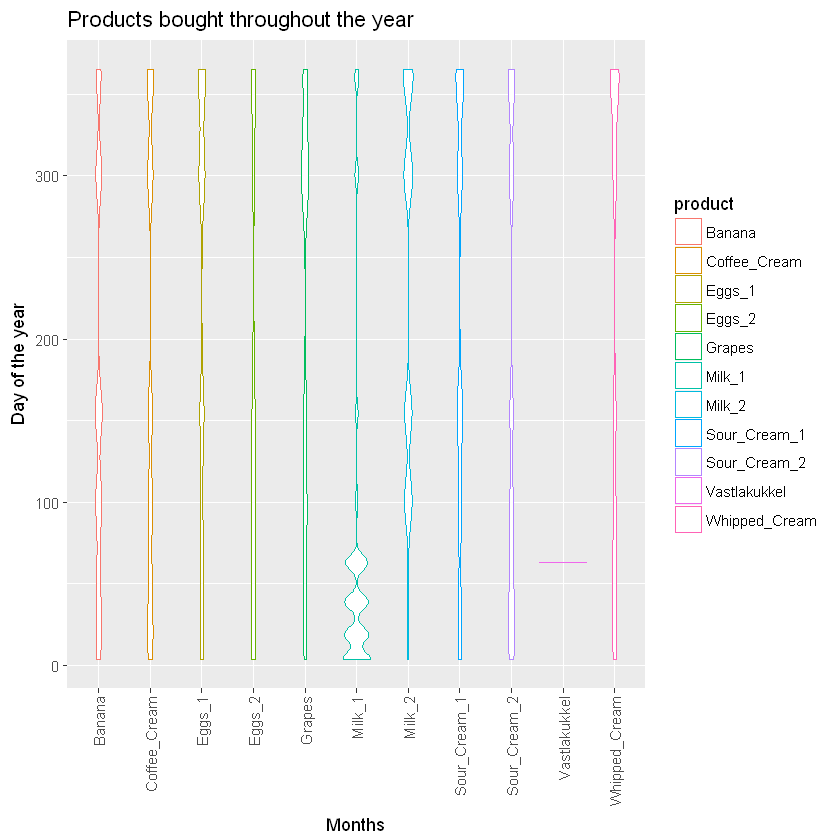

In [37]:
ggplot(product, aes(x=product, y=doy, color=product)) + 
  geom_violin() + 
  #geom_boxplot(width=.1) +
  labs(y="Day of the year", x = "Months", title = "Products bought throughout the year") +
  theme(axis.text.x=element_text(angle=90,hjust=1,vjust=0.5))

<p>Vastlakukkel should show data only for March, then the other items should show a kind of similar distribution during the whole year.</p>
<p>For this graph, the box plot was removed because it interfered with the very thing violin graphs. As we can see, Vastlakukkel shows only one line in March, which signals the only day it was sold. Then all products have a kind of similar distribution, with sales increasing during the last part of the year. It is surprising to see a line through great part of the second half of the year. Either the shop closed or sales for these products weren't recorded. Also interesting to see is the huge amount of Milk type 1 being sold at the beginning of the year, but the rest of the year, Milk type 2 is more popular.</p>

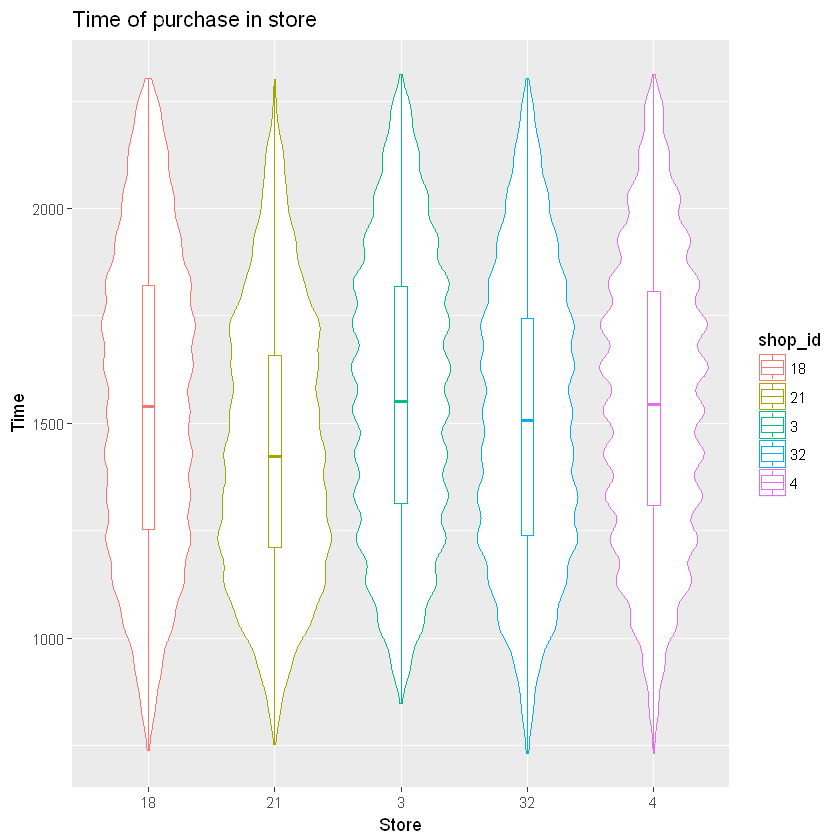

In [28]:
#shops
product["shop_id"] <- lapply(product["shop_id"], as.character)
ggplot(product, aes(x=shop_id, y=time, group=shop_id, color=shop_id)) + 
  geom_violin() +
  geom_boxplot(width=.1) +
  labs(y="Time", x = "Store", title = "Time of purchase in store")

<p>Here I don't expect to see variations from the data that we already know, that more people buy stuff in midday and then in the night. In theory, stores are all operating in the same country so there should not be variations regarding the way of people doing things and things like weather, schedules or similar factors.</p>
<p>We see that store 21 is different than the other ones, having the vast majority of their clientele before 3PM, and then dropping significantly. We can also see that store 3 starts its operatons later than the other ones. However, it still manages to display the same behavior as other stores. In these graphs the tendency towards shopping more in the night is not as apparent as in previous graphs, instead showing more normal distributed times.</p>

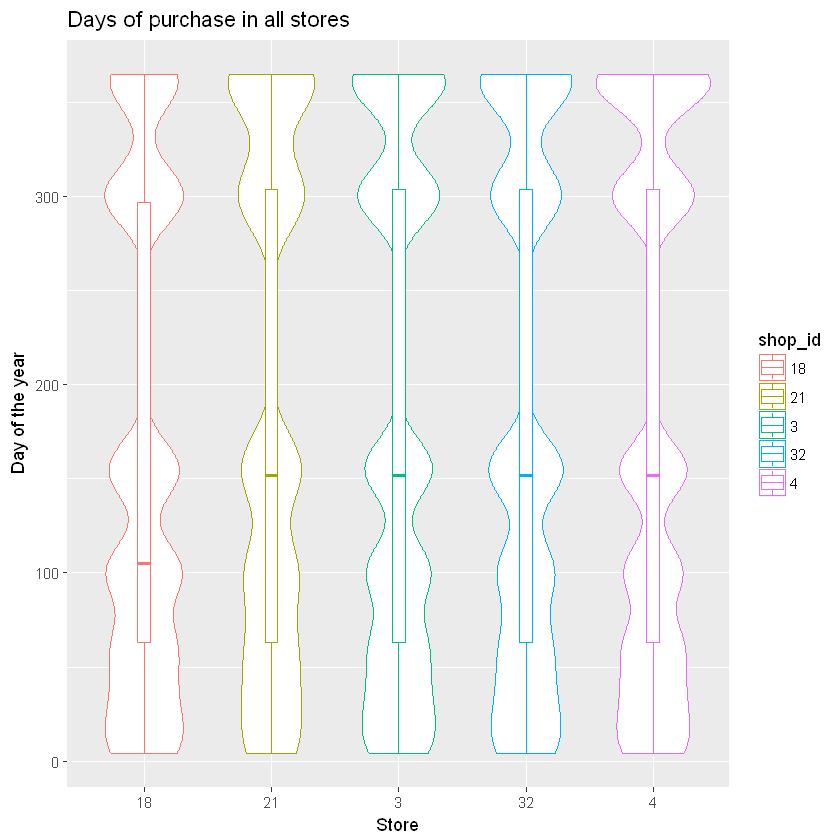

In [36]:
ggplot(product, aes(x=shop_id, y=doy, group=shop_id, color=shop_id)) + 
  geom_violin() +
  geom_boxplot(width=.1) +
  labs(y="Day of the year", x = "Store", title = "Days of purchase in all stores")

<p>Probably sales are bigger in the holiday season, from October to December, and then drop but keep steady throughout the year, since people needs to buy stuff all year long anyways. Also, distribution between stores should be similar for the reasons explained in the previous graph.</p>
<p>An unfortunate result of adding the box plot here is that it covers the region in which there are no sales (a little below 200 and until a little above 250. However, it still is very strange to see no data during this period. We can see that data is almost the same between different stores. There are stores where sales get a bit smaller during specific periods compared to the reductions experienced by other ones. This is true for stores 3 and 4 around the 125 day mark. However, it still adjusts to the tedency that all of them experience. For me it is a surprise to see sales slowing down so much through the holiday season, a period where normally food sale increases.</p>

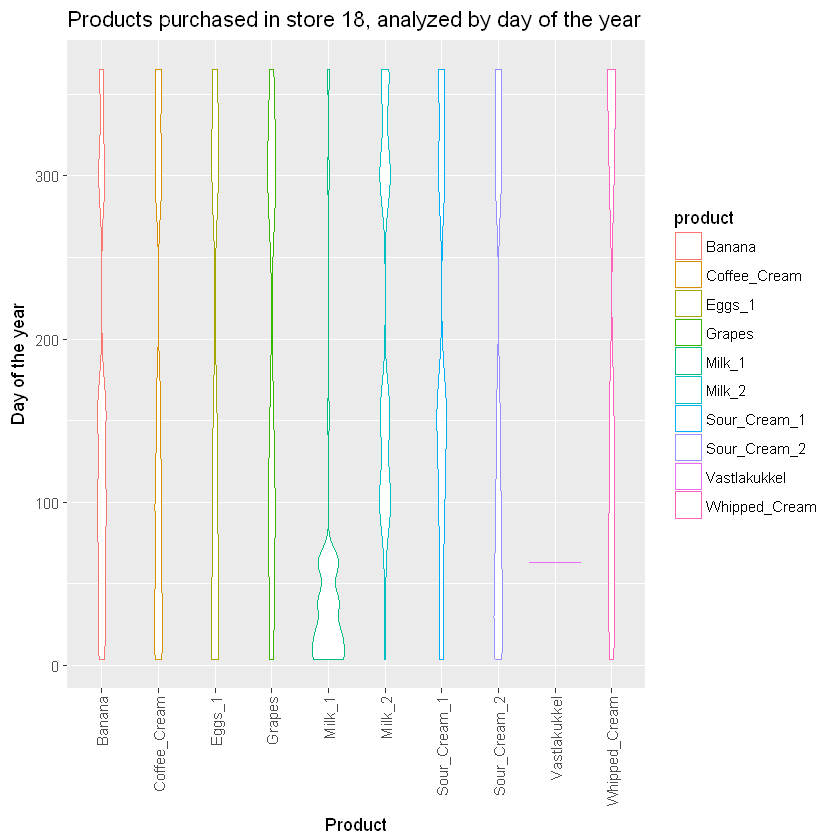

In [35]:
subset18 = subset(product, year == "2014" & shop_id == 18)
ggplot(subset18, aes(x=product, y=doy, group=product, color=product)) + 
  geom_violin() +
  labs(y="Day of the year", x = "Product", title = "Products purchased in store 18, analyzed by day of the year") +
  theme(axis.text.x=element_text(angle=90,hjust=1,vjust=0.5))

<p>This graph should show a similar distribution to the graph called Products sold throughout the year, since we've seen that information between shops change very little.</p>
<p>In fact, the store shows a very similar pattern to the graph referenced in the hypothesis, with big sales for Milk type 1 at the beginning of the year, Vastlakukkel appearing only on March and the other products showing very similar distributions.</p>

<h2>Exercise 5</h2>

<p>For this exercise, one of the graphs used in exercise 4 is used: Products purchased in store 18, analyzed by day of the year. This graph shows the availability of products throughout the year in the form of products sold. We can say that if a product is being sold and then it stops, the product is out of stock. Thus, with this graph, we can quickly infer which products are available and which are not, just by looking at the sales.</p>

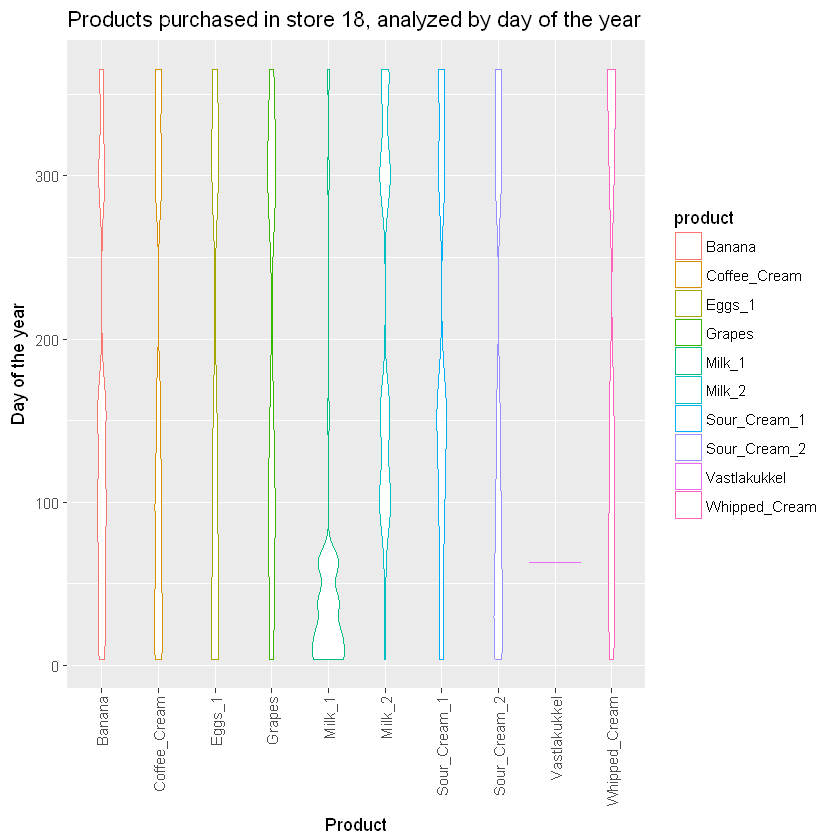

In [39]:
#ex 5
ggplot(subset18, aes(x=product, y=doy, group=product, color=product)) + 
  geom_violin() +
  labs(y="Day of the year", x = "Product", title = "Products purchased in store 18, analyzed by day of the year") +
  theme(axis.text.x=element_text(angle=90,hjust=1,vjust=0.5))

<p>As we saw on exercise 4, they all hold a steady sale number until above the 200 mark, where none of them report sales. Also, the graph Products bought throughout the year shows the graph for all shops, and we can see that ALL shops ran out of these items on these items at all periods, so it's not a store-specific issue but a chain-specific one.</p>
<p>After seeing this graph, we can then go on to check specific items to see their pattern of sales.</p>

In [50]:
print("Bananas sold")
subsetbanana2014 = subset(bananaSubset, year == 2014)
setNames(aggregate(product ~ doy, data = subsetbanana2014, FUN = length), c("Day of year", "Bananas sold"))

[1] "Bananas sold"


Day of year,Bananas sold
4,1653
19,1771
39,2000
63,1977
97,2470
105,2137
152,2379
158,2748
297,1766
304,2553


In [48]:
print("Milk type 1 sold")
subsetmilk2014 = subset(product, product == "Milk_1")
setNames(aggregate(product ~ doy, data = subsetmilk2014, FUN = length), c("Day of year", "Milk type 1 sold"))

[1] "Milk type 1 sold"


Day of year,Milk type 1 sold
4,3554
19,3154
39,3105
63,2877
97,204
105,187
152,248
158,197
297,314
304,321


In [49]:
print("Vastlakukkel sold")
subsetvastlakukkel = subset(product, product == "Vastlakukkel" & year == 2014)
setNames(aggregate(product ~ doy, data = subsetvastlakukkel, FUN = length), c("Day of year", "Vastlakukkel sold"))

[1] "Vastlakukkel sold"


Day of year,Vastlakukkel sold
63,4109


<p>However, this is done only to know specifics of each item. The inspection of the two previous graphs mentioned above is enough to get a quick glance of which items ran out when, in which stores (through the filtering of the data to specific stores or in all stores by not using any filter), and when they're restocked again (since sales start picking up again). This method provides a fairly automatic way of identifying which products are in stock or out of stock.</p>